In [1]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")
df.head(15)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [3]:
df.shape

(26707, 34)

In [4]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

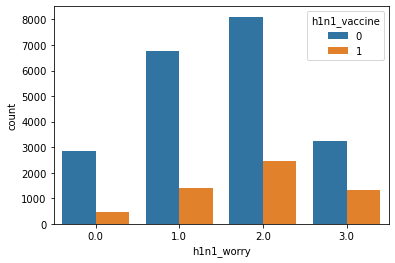

In [9]:
sns.countplot(x="h1n1_worry",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

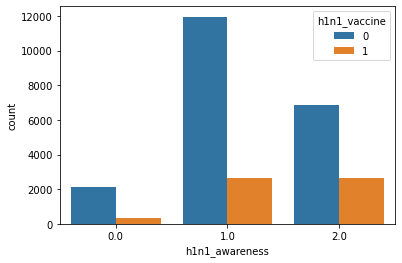

In [10]:
sns.countplot(x="h1n1_awareness",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

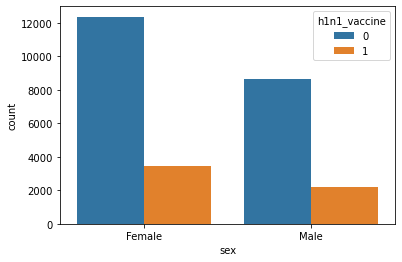

In [11]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

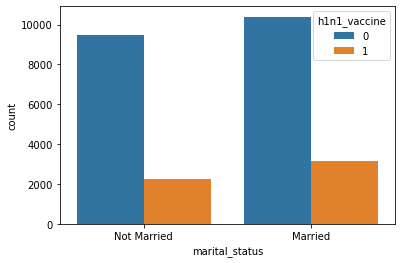

In [12]:
sns.countplot(x="marital_status",hue="h1n1_vaccine",data=df)

<AxesSubplot:xlabel='employment', ylabel='count'>

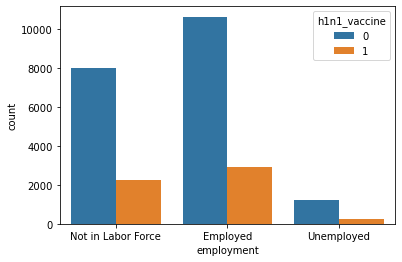

In [13]:
sns.countplot(x="employment",hue="h1n1_vaccine",data=df)

<AxesSubplot:>

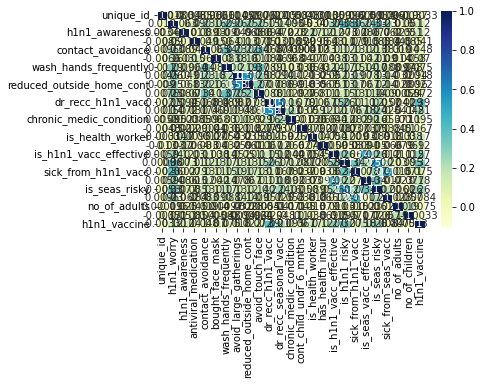

In [14]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat,annot=True,linewidths=1,cmap="YlGnBu")

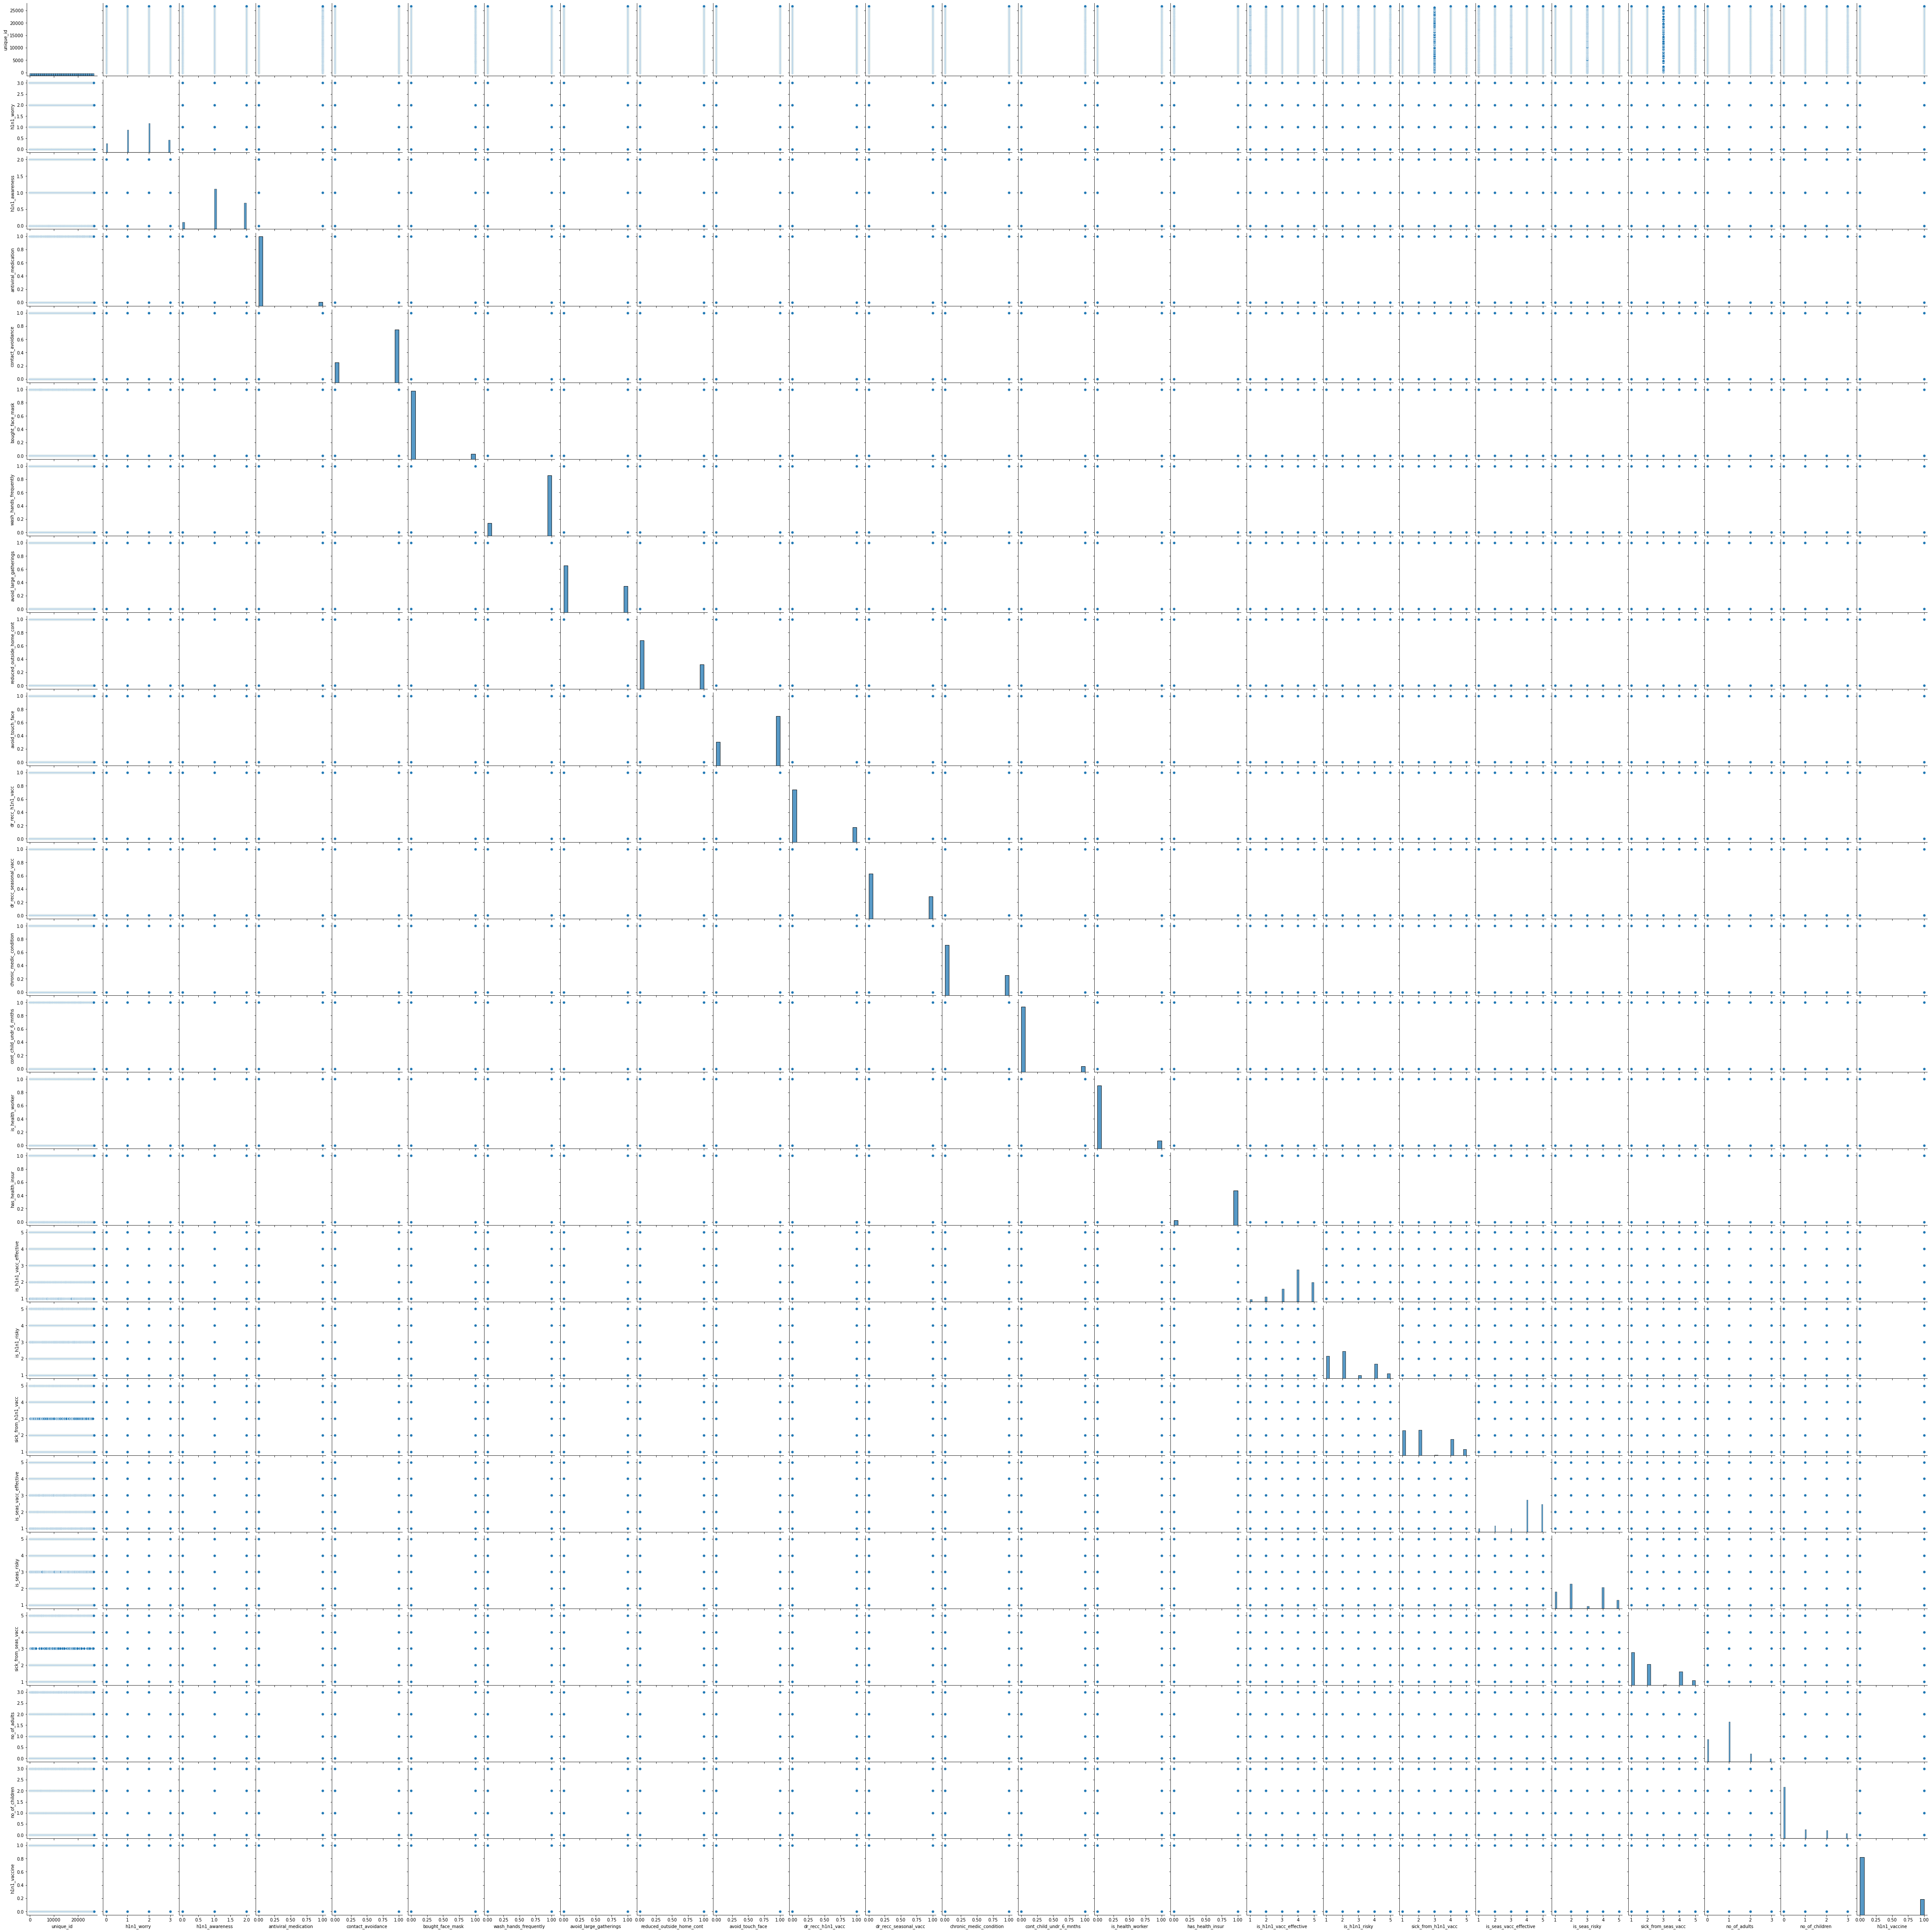

In [15]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

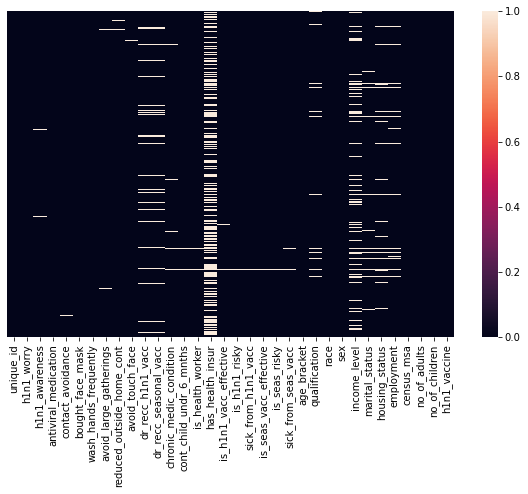

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [17]:
#Filling all Nan values with mode of respective variable
df["h1n1_worry"].fillna(df["h1n1_worry"].mode()[0],inplace=True)
df["h1n1_awareness"].fillna(df["h1n1_awareness"].mode()[0],inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].mode()[0],inplace=True)
df["contact_avoidance"].fillna(df["contact_avoidance"].mode()[0],inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].mode()[0],inplace=True)
df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].mode()[0],inplace=True)
df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].mode()[0],inplace=True)
df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].mode()[0],inplace=True)
df["avoid_touch_face"].fillna(df["avoid_touch_face"].mode()[0],inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].mode()[0],inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].mode()[0],inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].mode()[0],inplace=True)
df["has_health_insur"].fillna(df["has_health_insur"].mode()[0],inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].mode()[0],inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].mode()[0],inplace=True)
df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].mode()[0],inplace=True)

df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)

df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["marital_status"].fillna(df["marital_status"].mode()[0],inplace=True)
df["housing_status"].fillna(df["housing_status"].mode()[0],inplace=True)
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].mode()[0],inplace=True)
df["is_seas_vacc_effective"].fillna(df["is_seas_vacc_effective"].mode()[0],inplace=True)
df["is_seas_risky"].fillna(df["is_seas_risky"].mode()[0],inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].mode()[0],inplace=True)





print(df.isnull().sum())

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<AxesSubplot:>

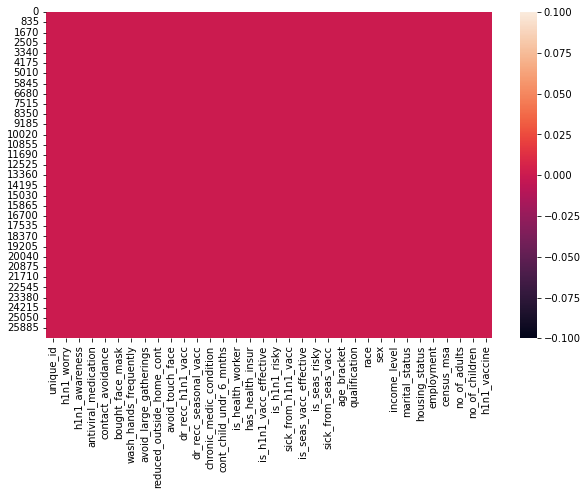

In [18]:
#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [19]:
#gettting the numerical datatype value columns from dataset


In [20]:
num_data = df.select_dtypes(exclude="object")
num_data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0


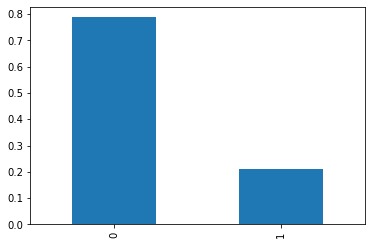

In [21]:
# Target variable distribution
df['h1n1_vaccine'].value_counts(normalize=True).plot(kind='bar');

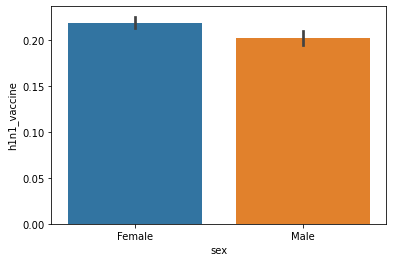

In [22]:
 #Gender and h1n1 vaccination status bar graph
sns.barplot(x=df['sex'], y=df['h1n1_vaccine']);

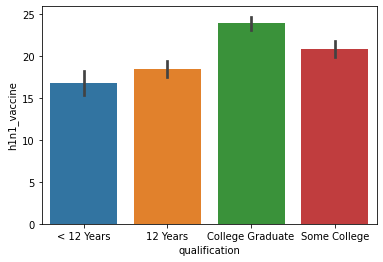

In [23]:
# Education level percentage distribution of the vaccinated people 
sns.barplot(x=df['qualification'], y=df['h1n1_vaccine']*100);

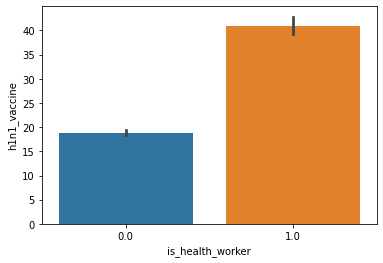

In [24]:
# Distribution of health workers who got the vaccine
sns.barplot(x=df['is_health_worker'], y=df['h1n1_vaccine']*100);

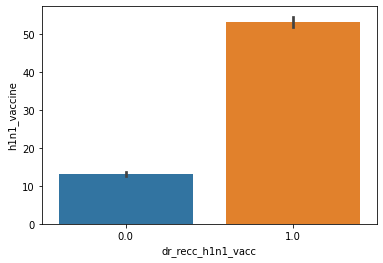

In [25]:
# Doctor recommendation vs H1N1 vaccine
sns.barplot(x=df['dr_recc_h1n1_vacc'], y=df['h1n1_vaccine']*100);

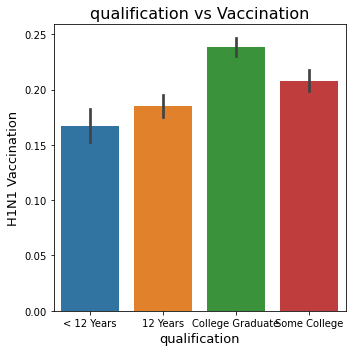

In [26]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Creating the bar plot with X = h1n1_knowledge and Y = h1n1_vaccine
sns.barplot(data = df, x=df['qualification'], y=df['h1n1_vaccine'])
# Setting title and labels
plt.title('qualification vs Vaccination', fontsize=16)
plt.xlabel('qualification', fontsize=13)
plt.ylabel('H1N1 Vaccination', fontsize=13)
plt.tight_layout();

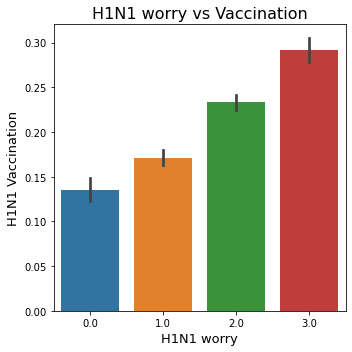

In [27]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Creating the bar plot with X = h1n1_knowledge and Y = h1n1_concern
sns.barplot(data = df, x=df['h1n1_worry'], y=df['h1n1_vaccine'])
# Setting title and labels
plt.title('H1N1 worry vs Vaccination', fontsize=16)
plt.xlabel('H1N1 worry', fontsize=13)
plt.ylabel('H1N1 Vaccination', fontsize=13)
plt.tight_layout();

In [28]:
obj_data = df.select_dtypes(include="object")
obj_data

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA



                                         Statistical Analysis of Categorical type data                                          



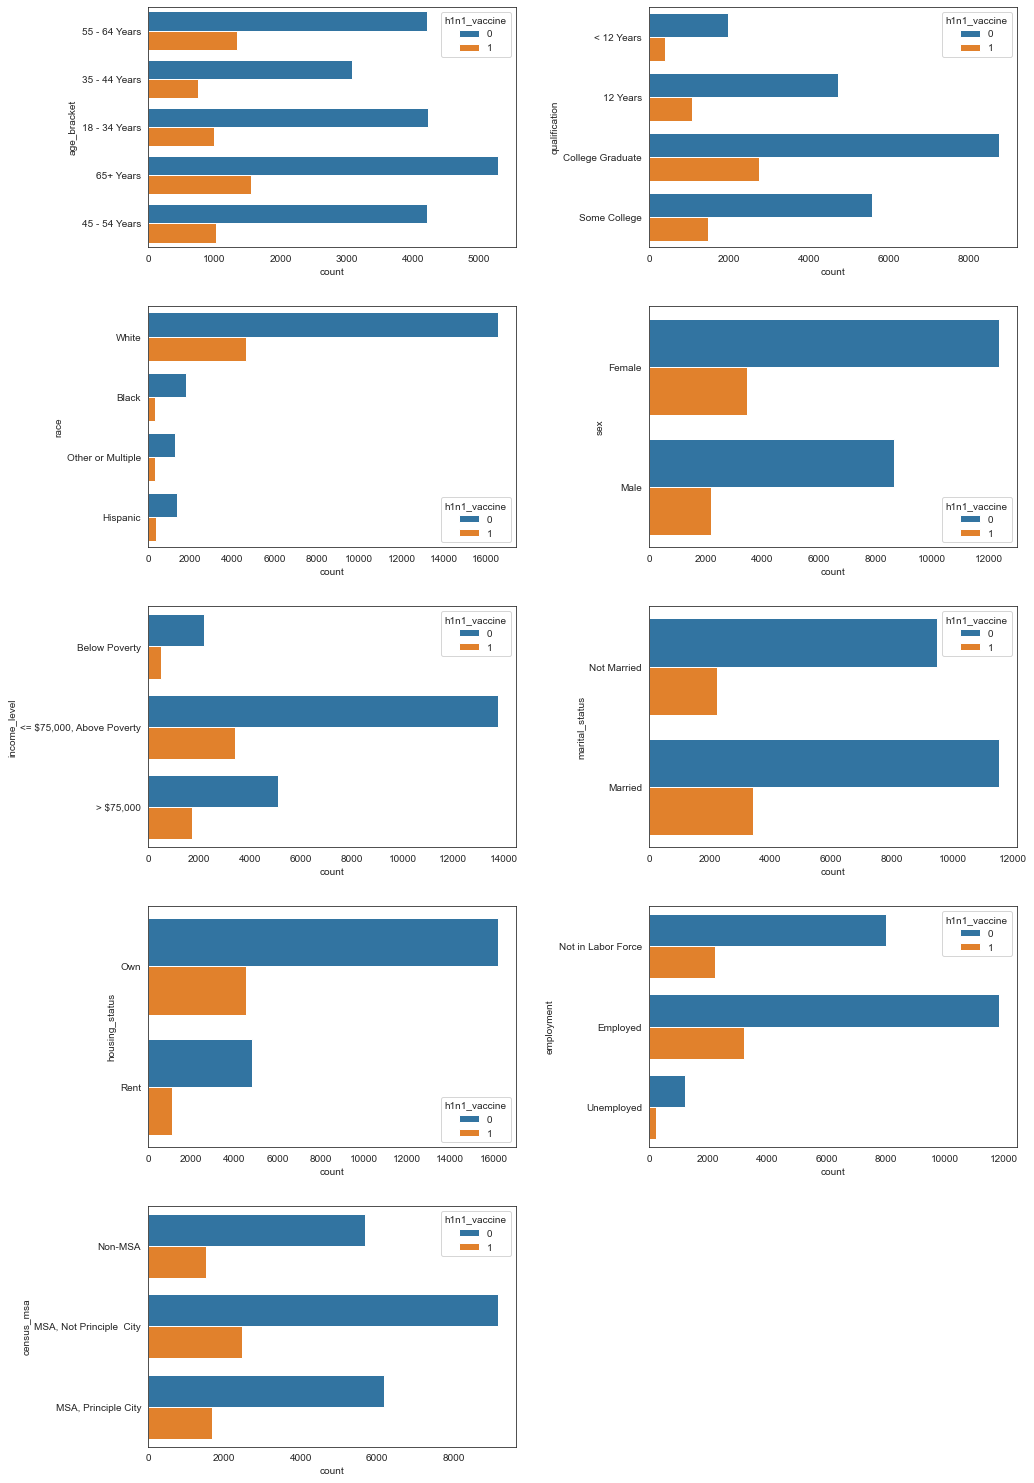

In [29]:
fig = plt.figure(figsize=(15,25))

txt = "Statistical Analysis of Categorical type data"
x = txt.center(128)
print(f"\033[1m\n{x}\n")
sns.set_style("white")
for index in range(len(obj_data.columns)):
    plt.subplot(6,2,index+1)
    sns.countplot( y =obj_data.iloc[:,index],hue=df["h1n1_vaccine"])
fig.tight_layout(pad=3)

In [30]:
# Joining numerical type data & object type data into one data frame

In [31]:
final_df = pd.concat([num_data,obj_data],axis=1)
final_df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,h1n1_vaccine,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [32]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])


df.head(15)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,0,0,0,0,1,2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,0,0,0,0,2,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3,1,1,0,0,0,0,1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,3,1,0,1,0,1,0,0.0,0.0,0


In [34]:
#Dividing data into Input X variables and Target Y variable
X = df[['unique_id','h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','race','sex','income_level','marital_status','housing_status','employment','census_msa','no_of_adults','no_of_children']]
y = df["h1n1_vaccine"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
# Logistic Regression

In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
model.score(X_train,y_train)

0.7891879241750527

In [40]:
model.score(X_test,y_test)

0.780980906027705

In [41]:
# Decision Tree Classifier

In [42]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
dtree.score(X_train,y_train)

1.0

In [44]:
dtree.score(X_test,y_test)

0.6628603519281168

In [45]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

0.7891879241750527


In [46]:
y_predict = dTreeR.predict(X_test)

In [47]:
print(dTreeR.score(X_test, y_test))

0.780980906027705


In [48]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.780980906027705


In [49]:
# Support Vector Machine Classifier

In [50]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7810


In [51]:
# Ada Boost Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.7791089479595658


In [53]:
# Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.7800449269936354


In [55]:
import sklearn.metrics as metrics

<AxesSubplot:>

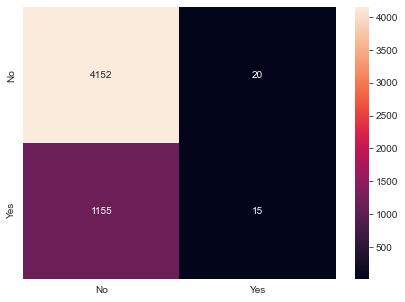

In [56]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [57]:
# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)

0.7598277798577312


<AxesSubplot:>

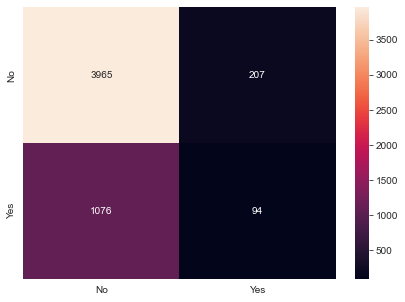

In [59]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

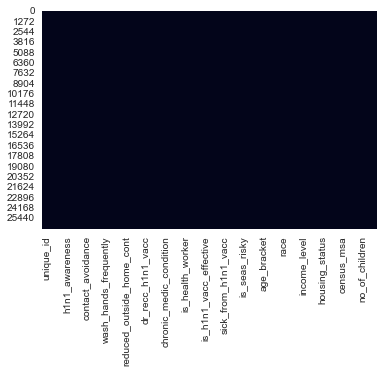

In [60]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()